In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('data/data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
#define X and y
X = data.drop(['labels'], axis=1)
y = data.loc[:,'labels']
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [5]:
pd.Series(y).value_counts()

labels
2    1156
1     954
0     890
Name: count, dtype: int64

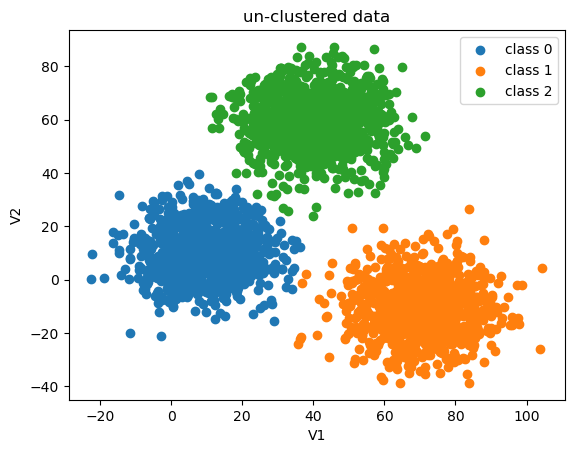

In [6]:
#matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
label1 =plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label2 =plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label3 =plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.title('un-clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))
plt.show()

In [7]:
print(X.shape, y.shape)

(3000, 2) (3000,)


In [8]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

In [9]:
centers = KM.cluster_centers_

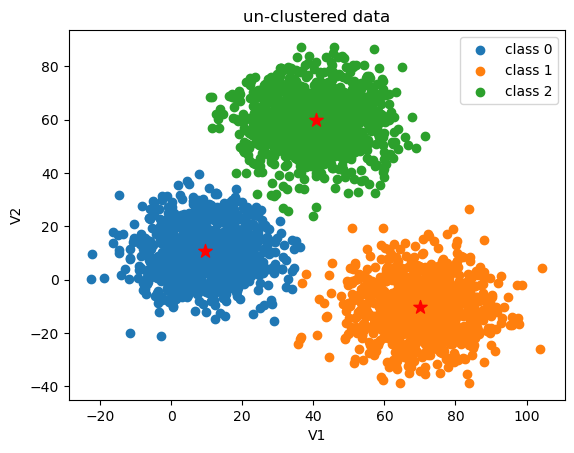

In [10]:
fig3 = plt.figure()

label1 =plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label2 =plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label3 =plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('un-clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))
plt.show()

In [11]:
y_pred = KM.predict(X)
print(pd.Series(y_pred).value_counts())

0    1149
1     952
2     899
Name: count, dtype: int64


In [12]:
from sklearn.metrics import accuracy_score

# 计算准确率
y_pred = KM.predict(X)
accuracy = accuracy_score(y, y_pred)
print("准确率:", accuracy)

准确率: 0.31966666666666665


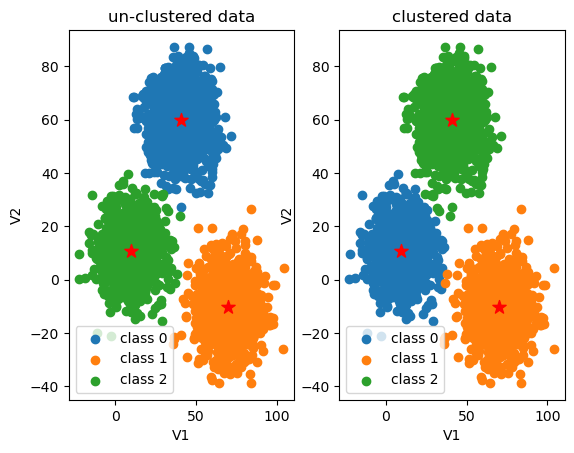

In [13]:
fig4 = plt.subplot(121)
label1 =plt.scatter(X.loc[:,'V1'][y_pred==0],X.loc[:,'V2'][y_pred==0])
label2 =plt.scatter(X.loc[:,'V1'][y_pred==1],X.loc[:,'V2'][y_pred==1])
label3 =plt.scatter(X.loc[:,'V1'][y_pred==2],X.loc[:,'V2'][y_pred==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('un-clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

fig5 = plt.subplot(122)
label1 =plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label2 =plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label3 =plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

plt.show()

In [14]:
y_correct = []
for i in y_pred:
    if i == 0:
        y_correct.append(2)
    elif i == 1:
        y_correct.append(1)
    else :
        y_correct.append(0)


In [15]:
print(accuracy_score(y,y_correct))
y_correct = np.array(y_correct)

0.997


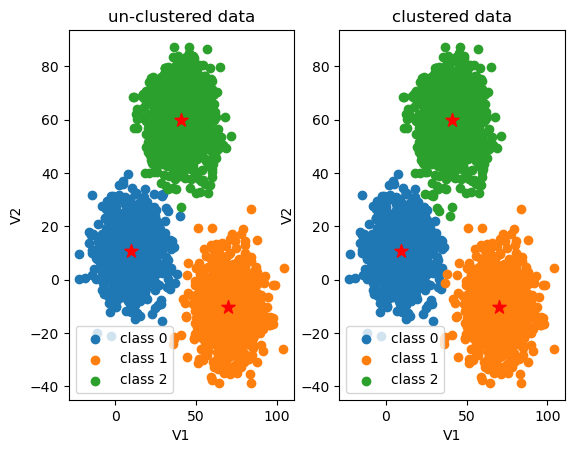

In [16]:
fig4 = plt.subplot(121)
label1 =plt.scatter(X.loc[:,'V1'][y_correct==0],X.loc[:,'V2'][y_correct==0])
label2 =plt.scatter(X.loc[:,'V1'][y_correct==1],X.loc[:,'V2'][y_correct==1])
label3 =plt.scatter(X.loc[:,'V1'][y_correct==2],X.loc[:,'V2'][y_correct==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('un-clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

fig5 = plt.subplot(122)
label1 =plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label2 =plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label3 =plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

plt.show()

In [17]:
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [19]:
#predict base on the test data V1=80,V2=60
y_predict_knn_test=KNN.predict([[80,60]])
print(y_predict_knn_test)
y_predict_knn = KNN.predict(X)

print('knn_accuracy:',accuracy_score(y, y_predict_knn))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[2]
knn_accuracy: 1.0


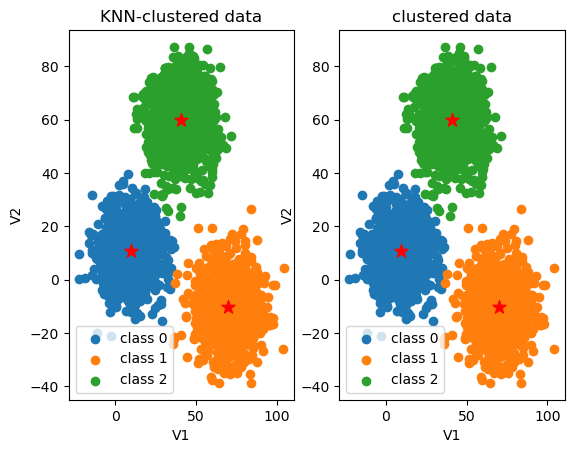

In [20]:
fig4 = plt.subplot(121)
label1 =plt.scatter(X.loc[:,'V1'][y_predict_knn==0],X.loc[:,'V2'][y_predict_knn==0])
label2 =plt.scatter(X.loc[:,'V1'][y_predict_knn==1],X.loc[:,'V2'][y_predict_knn==1])
label3 =plt.scatter(X.loc[:,'V1'][y_predict_knn==2],X.loc[:,'V2'][y_predict_knn==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('KNN-clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

fig5 = plt.subplot(122)
label1 =plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label2 =plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label3 =plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

In [21]:
#try mean shift model
from sklearn.cluster import MeanShift,estimate_bandwidth

bw = estimate_bandwidth(X,  n_samples=500)
print(bw)

30.84663454820215


In [22]:
ms = MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [23]:
y_predict_ms = ms.predict(X)
print(pd.value_counts(y_predict_ms),pd.value_counts(y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\limenghua\AppData\Local\Temp\ipykernel_12396\590679804.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict_ms),pd.value_counts(y))


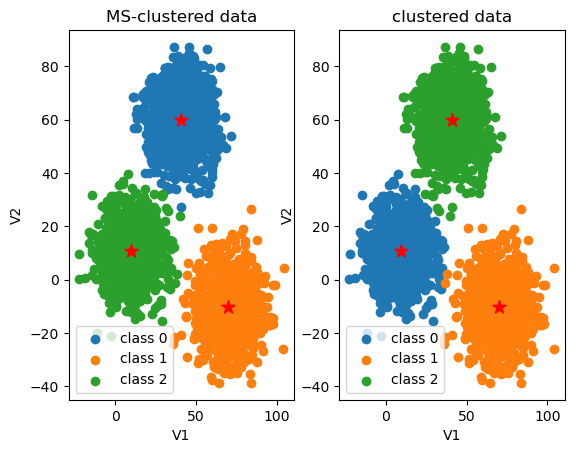

In [24]:
fig4 = plt.subplot(121)
label1 =plt.scatter(X.loc[:,'V1'][y_predict_ms==0],X.loc[:,'V2'][y_predict_ms==0])
label2 =plt.scatter(X.loc[:,'V1'][y_predict_ms==1],X.loc[:,'V2'][y_predict_ms==1])
label3 =plt.scatter(X.loc[:,'V1'][y_predict_ms==2],X.loc[:,'V2'][y_predict_ms==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('MS-clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

fig5 = plt.subplot(122)
label1 =plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label2 =plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label3 =plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

In [25]:
y_correct_ms = []
for i in y_predict_ms:
    if i == 0:
        y_correct_ms.append(2)
    elif i == 1:
        y_correct_ms.append(1)
    else:
        y_correct_ms.append(0)

y_correct_ms = np.array(y_correct_ms)

print(y_correct_ms)

[0 0 0 ... 1 1 1]


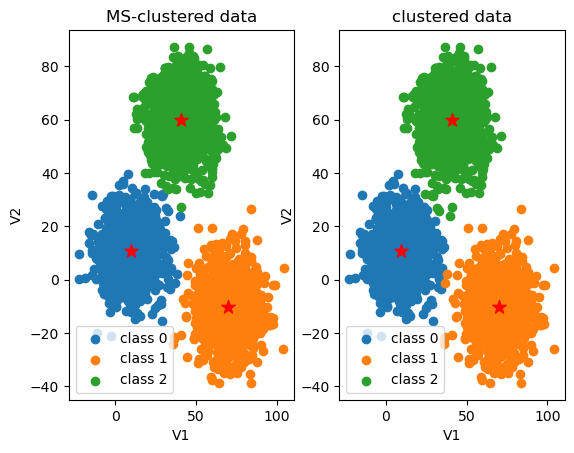

In [26]:
fig4 = plt.subplot(121)
label1 =plt.scatter(X.loc[:,'V1'][y_correct_ms==0],X.loc[:,'V2'][y_correct_ms==0])
label2 =plt.scatter(X.loc[:,'V1'][y_correct_ms==1],X.loc[:,'V2'][y_correct_ms==1])
label3 =plt.scatter(X.loc[:,'V1'][y_correct_ms==2],X.loc[:,'V2'][y_correct_ms==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('MS-clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))

fig5 = plt.subplot(122)
label1 =plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label2 =plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label3 =plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='r', s=100, label='Centroids')
plt.title('clustered data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label1,label2,label3),('class 0','class 1','class 2'))